In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

In [44]:
df = pd.read_csv('airfares_combined.csv', low_memory = False)

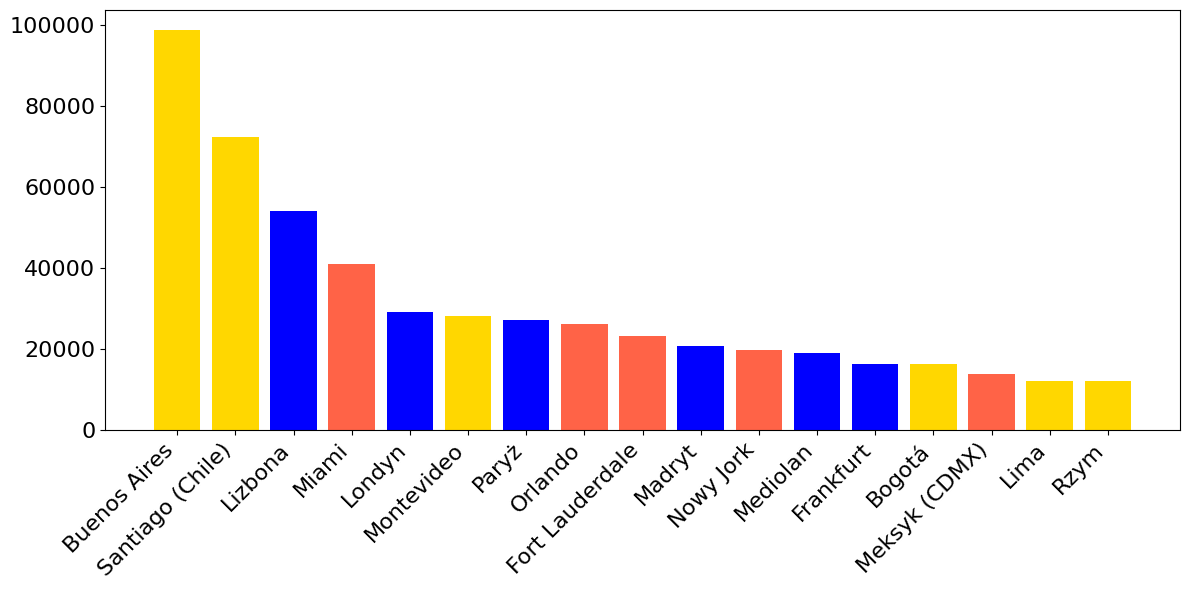

In [45]:
# Grupowanie: liczba lotów do każdego miasta
city_counts = df['destination_city'].value_counts().reset_index()
city_counts.columns = ['destination_city', 'count']

# Wybór 16 najpopularniejszych kierunków
top16 = city_counts.head(16)

# Grupy miast
europe = ['Lizbona', 'Londyn', 'Paryż', 'Madryt', 'Mediolan', 'Frankfurt', 'Barcelona']
south_america = ['Buenos Aires', 'Bogotá', 'Lima', 'Santiago (Chile)', 'Montevideo']
north_america = ['Miami','Fort Lauderdale', 'Orlando', 'Nowy Jork', 'Meksyk (CDMX)']

# Kolory według kontynentu
color_map = {
    'Europa': 'b',
    'Ameryka Południowa': 'gold',
    'Ameryka Północna': 'tomato'
}

# Funkcja przypisująca kolor
def get_color(city):
    if city in europe:
        return color_map['Europa']
    elif city in south_america:
        return color_map['Ameryka Południowa']
    elif city in north_america:
        return color_map['Ameryka Północna']

# Kolory dla słupków
colors = [get_color(city) for city in top16['destination_city']]

# Rysowanie wykresu
plt.figure(figsize=(12, 6))
plt.bar(top17['destination_city'], top17['count'], color=colors)
plt.xticks(rotation=45, ha='right')
plt.ylabel('')


plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.show()

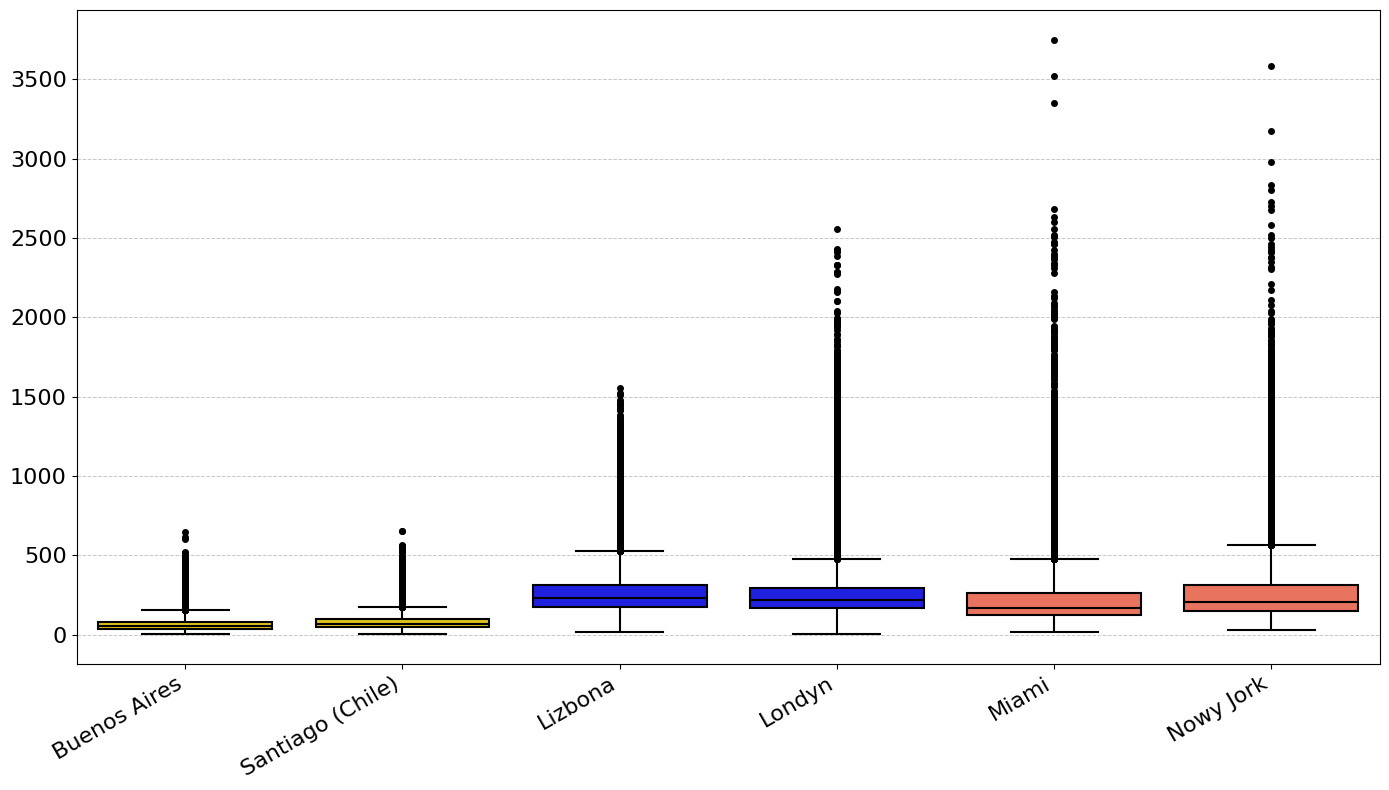

In [46]:
selected_cities = ['Buenos Aires', 'Santiago (Chile)', 'Lizbona', 'Londyn', 'Miami', 'Nowy Jork']
custom_palette = {
    'Buenos Aires': 'gold',
    'Santiago (Chile)': 'gold',
    'Lizbona': 'b',
    'Londyn': 'b',
    'Miami': 'tomato',
    'Nowy Jork': 'tomato'
}

# Filtrowanie: miasta i ceny ≤ 4000 USD
filtered_df = df[
    (df['destination_city'].isin(selected_cities)) &
    (df['fare_usd'] <= 4000)
]

plt.figure(figsize=(14, 8))

# Boxplot z czarnymi obramowaniami i punktami outlierów
ax = sns.boxplot(
    data=filtered_df,
    x='destination_city',
    y='fare_usd',
    hue='destination_city',
    order=selected_cities,
    palette=custom_palette,
    showfliers=True,
    boxprops=dict(edgecolor='black', linewidth=1.5),
    whiskerprops=dict(color='black', linewidth=1.5),
    capprops=dict(color='black', linewidth=1.5),
    medianprops=dict(color='black', linewidth=1.5),
    flierprops=dict(marker='o', markerfacecolor='black', markeredgecolor='black', markersize=4),
    dodge=False,
    legend=False
)

# Obramowanie osi
for spine in ax.spines.values():
    spine.set_edgecolor('black')

# Etykiety i styl
plt.xticks(rotation=30, ha='right', fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
ax.set_xlabel('')
ax.set_ylabel('')

# Dodanie siatki poziomej
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.show()

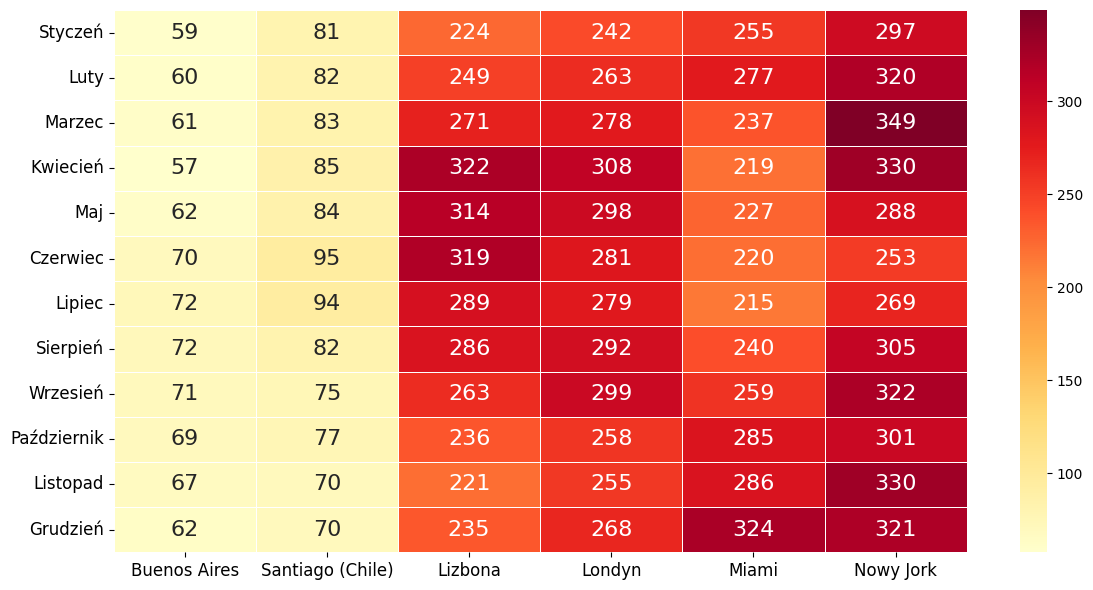

In [42]:
city_order = ['Buenos Aires', 'Santiago (Chile)', 'Lizbona', 'Londyn', 'Miami', 'Nowy Jork']

# Filtrowanie danych
i6_df = df[df['destination_city'].isin(city_order)]

# Tworzenie tabeli przestawnej i ustawienie kolejności kolumn
heatmap_data = i6_df.pivot_table(
    index='month',
    columns='destination_city',
    values='fare_usd',
    aggfunc='mean'
).reindex(columns=city_order)

# Tworzenie wykresu heatmapy
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt=".0f", linewidths=0.5, annot_kws={"fontsize": 16})

# Formatowanie osi
plt.title('')
plt.xlabel('')
plt.ylabel('')

plt.yticks(
    ticks=np.arange(12) + 0.5,
    labels=[
        'Styczeń', 'Luty', 'Marzec', 'Kwiecień', 'Maj', 'Czerwiec',
        'Lipiec', 'Sierpień', 'Wrzesień', 'Październik', 'Listopad', 'Grudzień'
    ],
    rotation=0,
    fontsize=12
)

plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

,year,month,airline,origin,origin_city,destination,destination_city,flight_type,fare_brl,fare_usd,mean_rate
5273202,2023,5,AAL,SBGL,RIO DE JANEIRO,KMIA,Miami,INTERNATIONAL,2100.0,421.836638,4.978230
5273205,2023,5,AAL,SBGL,RIO DE JANEIRO,KMIA,Miami,INTERNATIONAL,715.0,143.625332,4.978230
5273207,2023,5,AAL,SBGR,GUARULHOS,KMIA,Miami,INTERNATIONAL,720.0,144.629705,4.978230
5273209,2023,5,AAL,SBGR,GUARULHOS,KMIA,Miami,INTERNATIONAL,730.0,146.638450,4.978230
5273210,2023,5,AAL,SBGR,GUARULHOS,KMIA,Miami,INTERNATIONAL,733.0,147.241074,4.978230
...,...,...,...,...,...,...,...,...,...,...,...
5435075,2023,7,UAE,SBGL,RIO DE JANEIRO,SAEZ,Buenos Aires,INTERNATIONAL,303.0,63.127152,4.799836
5435076,2023,7,UAE,SBGL,RIO DE JANEIRO,SAEZ,Buenos Aires,INTERNATIONAL,358.0,74.585877,4.799836
5435078,2023,7,UAE,SBGL,RIO DE JANEIRO,SAEZ,Buenos Aires,INTERNATIONAL,333.0,69.377366,4.799836
5435079,2023,7,UAE,SBGL,RIO DE JANEIRO,SAEZ,Buenos Aires,INTERNATIONAL,278.0,57.918642,4.799836
